In [ ]:
#Wrangling Assignment - Avery Anderson kdu7bp

Q1. This question provides some practice cleaning variables which have common problems.
1A: Cleaning the Price column on airbnb data

In [3]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

In [3]:
df = pd.read_csv('/Users/averyanderson/Desktop/data/airbnb_hw.csv',low_memory=False) #read in data

In [5]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables
print(df.columns, '\n') # Column names

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 



In [7]:
df.head(5) #view to check it was read in correctly

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [9]:
df['Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [11]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Coerce the variable to numeric
df['price_nan'] = df['Price'].isnull() # Equals 1 if missing, 0 if non-null
print('After coercion: \n', df['Price'].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(df['price_nan']),'\n') # How many missing values are there?

After coercion: 
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64 

Total Missings: 
 181 



^^ Above I realized that the values with commas could not be used as numerical integers. Using the code learned in the wrangling lesson in class, I coerced the column to be all numerical which resulted in 118 missing values

Q1 Part B: Minnesota Data

In [15]:
df2 = pd.read_csv('/Users/averyanderson/Desktop/data/mn_police_use_of_force.csv',low_memory=False)

In [51]:
df2.head(20)

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
5,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
6,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Female,20.0,Commission of Crime,1,Downtown West
7,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
8,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Unspecified,1,Downtown West
9,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Crowd Control Mace,Black,Male,18.0,commission of crime,1,Downtown West


In [31]:
df2['subject_injury'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [33]:
total = len(df2)
print(total)

12925


In [45]:
print(df2['subject_injury'].unique(), '\n') 
df2['subject_injury'] = df['subject_injury'].replace(' ',np.nan) 
print(df2['subject_injury'].value_counts(), '\n')

[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 



Of 12,925 total datapoints, only 3,077 are a yes or a no which is concerning because it means that a majority of this information is missing. Only 23.8% have the yes or no

In [53]:
cross_tab = pd.crosstab(df2['force_type'], df2['subject_injury'])
print(cross_tab)

subject_injury            No   Yes
force_type                        
Baton                      0     2
Bodily Force            1093  1286
Chemical Irritant        131    41
Firearm                    2     0
Gun Point Display         33    44
Improvised Weapon         34    40
Less Lethal Projectile     1     2
Police K9 Bite             2    44
Taser                    150   172


It appears that most of the data known about injuries comes from instances with bodily force, especially compared to some other cases like those of chemical irritants

Q1-C: 

In [61]:
df3 = pd.read_parquet('/Users/averyanderson/Desktop/data/justice_data.parquet') #reading in data

In [63]:
df3.head(10)

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
5,CDI00039,8,M,B,1978,39,4,39,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
6,CDI00041,9,F,B,1981,35,3,35,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
7,CDI00043,10,M,B,1999,18,2,18,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
8,CDI00044,11,M,B,1990,27,3,27,1,1,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
9,CDI00046,12,M,W,1996,21,2,21,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [65]:
var = 'WhetherDefendantWasReleasedPretrial' # A Dummy Example
print(df3[var].unique(), '\n')
df3[var] = df3[var].replace( " ", np.nan) 
print(df3[var].value_counts()) 

[9 0 1] 

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64


Q1 - D: Cleaning ImposedSentenceAllChargeInContactEvent

In [71]:
df3['ImposedSentenceAllChargeInContactEvent'].head(10) #first look at the column

0                    
1                  60
2                  12
3    .985626283367556
4                    
5                  12
6                  36
7                   6
8                  24
9                  12
Name: ImposedSentenceAllChargeInContactEvent, dtype: object

In [73]:
df3['SentenceTypeAllChargesAtConvictionInContactEvent'].head(10) #looking at this column for comparison

0    9
1    0
2    1
3    1
4    4
5    0
6    1
7    0
8    1
9    1
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64

In [77]:
df3['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df3['ImposedSentenceAllChargeInContactEvent'], errors='coerce') # Coerce the variable to numeric
df3['sentence_x'] = df3['ImposedSentenceAllChargeInContactEvent'].isnull() # Equals 1 if missing, 0 if non-null
print('After coercion: \n', df3['ImposedSentenceAllChargeInContactEvent'].describe(),'\n') # Describe the numeric variable

After coercion: 
 count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64 



I noticed that the conviction sentence column was all integers, which pointed me towards changing the imposed sentence type from object to a float since these datapoints are decimals

Question 2: Sharks

In [5]:
df4 = pd.read_excel('/Users/averyanderson/Desktop/data/GSAF5.xlsx') #read in data

In [7]:
df4.head(10) #check that it was read in correctly

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-12-28 00:00:00,2024.0,Unprovoked,Australia,Queensland,Humpy Island Great Keppel Island,Spearfishing,Luke Walford,M,40,...,Unknown,Todd Smith Glen Folkard ABC News: The North We...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-12-02 00:00:00,2024.0,Unprovoked,Australia,Queensland,Curtis Island Near Gladstone QLD central coast,Spearfishing,Not stated,M,60+,...,Not stated,Glen Folkard GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-01 00:00:00,2024.0,Unprovoked,Australia,Western Australia,Greenough River Mouth Beach Cape Burney 12km s...,Surfing,James Sweetman (child),M,?,...,1m shark species unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df4['Year'].max()

2026.0

In [93]:
df4['Year'].min()

0.0

In [33]:
var = 'Year' # A numeric variable
df4[var] = pd.to_numeric(df4[var], errors='coerce') # Coerce the variable to numeric
df4['year_nan'] = df4[var].isnull()

In [47]:
#clean year find range, filter after 1940, are they increasing decreasing?
print(df4['Year'].value_counts(), '\n') 
conditional =  (df4['Year']>= 1940) 
print(conditional.value_counts(), '\n') 

df_1940 = df4[ conditional ] # Create new dataset with post 1940 years only
print('Old dataframe: ', df4.shape, '\n', 'New dataframe: ', df_1940.shape)

Year
2015.0    143
2017.0    140
2016.0    131
0.0       129
2011.0    128
         ... 
1785.0      1
1784.0      1
1783.0      1
1780.0      1
1802.0      1
Name: count, Length: 261, dtype: int64 

Year
True     5458
False    1534
Name: count, dtype: int64 

Old dataframe:  (6992, 25) 
 New dataframe:  (5458, 25)


Axes(0.125,0.11;0.775x0.77) 



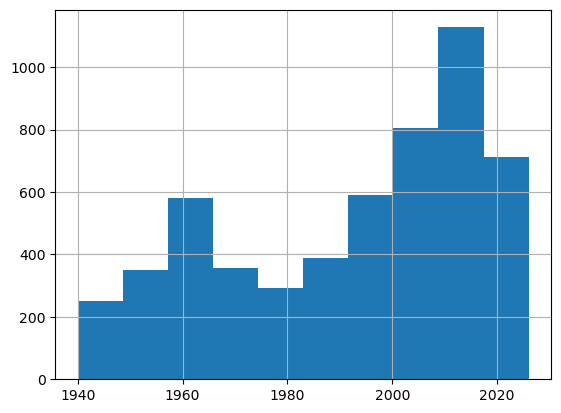

In [49]:
print(df_1940['Year'].hist(), '\n') #increasing number of reported shark attacks

Axes(0.125,0.11;0.775x0.77) 



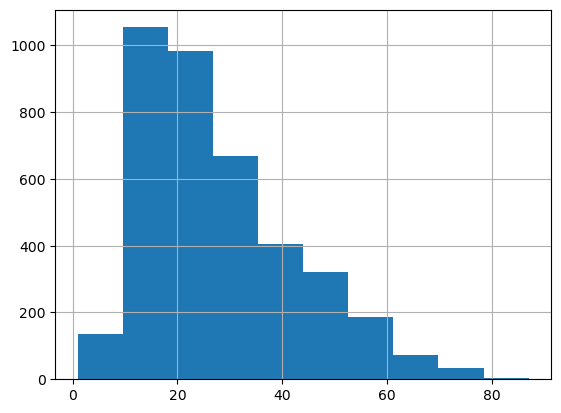

In [17]:
#Histogram of ages
var = 'Age' # A numeric variable
df4[var] = pd.to_numeric(df4[var], errors='coerce') # Coerce the variable to numeric
df4['age_nan'] = df4[var].isnull() # Equals 1 if missing, 0 if non-null
print(df4[var].hist(), '\n')

In [19]:
#what propotion of the victims are male
df4['Sex'] = df4['Sex'] 
var = 'Sex'
print(df4[var].unique(),'\n') 
print(df4[var].value_counts(), '\n') # 87% of the victims are male

['M' 'F' nan ' M' 'M ' 'lli' 'M x 2' 'N' '.'] 

Sex
M        5613
F         792
M           2
N           2
 M          1
lli         1
M x 2       1
.           1
Name: count, dtype: int64 



In [57]:
df_1940.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,age_nan,year_nan
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [77]:
#Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
print(df_1940['Type'].value_counts(), '\n')
conditional = (df_1940['Type']=='Unprovoked') 
print(conditional.value_counts(), '\n')
#74% were unprovoked

Type
Unprovoked    4055
Unknown        887
Provoked       516
Name: count, dtype: int64 

Type
True     4055
False    1403
Name: count, dtype: int64 



In [ ]:
#Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

In [83]:
print(df_1940['Fatal Y/N'].value_counts(), '\n')
conditional = (df_1940['Fatal Y/N']=='Y') 
print(conditional.value_counts(), '\n')

Fatal Y/N
N          4178
Y           811
UNKNOWN      45
 N            7
F             4
M             3
n             1
Nq            1
2017          1
Y x 2         1
Name: count, dtype: int64 

Fatal Y/N
False    4647
True      811
Name: count, dtype: int64 



In [85]:
df_1940 = df_1940[df_1940['Fatal Y/N'].isin(['Y', 'N','Unknown'])]

In [87]:
print(df_1940['Fatal Y/N'].value_counts(), '\n')
conditional = (df_1940['Fatal Y/N']=='Y') 
print(conditional.value_counts(), '\n')

Fatal Y/N
N    4178
Y     811
Name: count, dtype: int64 

Fatal Y/N
False    4178
True      811
Name: count, dtype: int64 



Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

In [91]:
cross_tab = pd.crosstab(df_1940['Sex'], df_1940['Type'])
print(cross_tab) #unprovoked more likely to be men

Type  Provoked  Unknown  Unprovoked
Sex                                
 M           0        0           1
F           28       26         592
M          434      256        3276
M            0        0           2
lli          0        0           1


In [93]:
cross_tab = pd.crosstab(df_1940['Fatal Y/N'], df_1940['Type'])
print(cross_tab) #more likely to be fatal when unprovoked

Type       Provoked  Unknown  Unprovoked
Fatal Y/N                               
N               492      367        3319
Y                12      120         679


In [97]:
cross_tab = pd.crosstab(df_1940['Fatal Y/N'], df_1940['Sex'])
print(cross_tab) #more likely to be fatal when the victim is male, but only by about 5%
#I like sharks from a distance but I do not need to go swimming with them

Sex         M    F     M  M   lli
Fatal Y/N                        
N           1  559  3318   2    1
Y           0   87   648   0    0


What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)

In [109]:
df_1940['Species'] = df_1940['Species'].str.lower()
ws_attacks = df_1940['Species'].str.contains('white shark|great white', na=False)
number = ws_attacks.mean()
number
#12.9% of attacks involved white sharks

0.12928442573662058

Question 4 Census Data Responses:
1. The 2020 Census collected data on race by allowing write in answers for the first time. Expanding from previous forms of the question, the 2020 census allowed those filling it out to check a box and then further specify race by writing it in. There was also an "other" category which allowed individuals to write in a race that was not previously listed.
2. The Census data is one of the most comprehensive sets of recent data of the US population and that data has real implications. The Census data is used to allocate federal funding and influence policy decisions. In addition to the uses by the government, other researchers will further use this data in their work. This data matters because it has real impacts on communities as people look at this data to determine decisions from funding to potential development projects.
3. The 2020 Census took a big step towards being more inclusive by enabling write in options. However, when dealing with data of real people, collecting that data with care is important. The current Census model still does not have a clear way for Americans with mixed race backgrounds to answer that question except by checking multiple boxes, which leaves unknowns. The balance between specific, personal data and data that is actually feasible to work with is a fine line. The more personal one allows the data to be, the harder it is to work with. But, dealing with real individuals and their background and seeking to accurately represent the US population, having those specifics is important. The write in option may complicate the data cleaning process, but it also allows more people to feel like they have a way to accurately represent themselves.
4. The 2020 Census only asked a question on biological sex with two answers being male or female. This question differs from the direction the Census was heading with the question about Race, which allowed much more flexibility in terms of what people could answer. Sex and gender have widely been considered two different entities and categories through which people identify. By limiting the answer choices to the question on sex without having a question on gender, the Census limits it accuracy in data. This data is used to examine issues like the gender wage gap, but by limiting the questions to sex, the Census looses all ability to analyze data from both transgender and non-binary individuals. If the census truly seeks to be able to analyze data on all US citizens, its limited answer choices mean that it is failing to represent a portion of those people.
5. Individual data is more complicated. It doesn't fit into boxes easy to categorize which can tempt those cleaning it to want to remove or simplify it, defeating the purpose of it in the first place. It would be a lost easier to analyze data on race if there are only 5 possible responses, but that would not be representative of the population. That data would be easier, but it would be false. The bad practice of deleting complicated data could be tempting. However, each day new technology in data analysis is making it easier to examine more complex data. Maybe AI can be a tool to parse through more options of responses. Just as there is potential for bad practices, there is also potential for good as people work to get more accurate and more representative data.
6. As I have mentioned before, when dealing with data of people, simplification can always be worrying. The fear that reducing someone's identity to a code or number can present problems in generalizations. Creating an algorithm to determine those categories would also require clear definitions of those categories. Who is responsible for designing an algorithm that defines what categories of gender or race there are? While there is potential for a better system that could help make accurate but easily analyzed data, these issues are ones that need to be considered. 